In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
calender_seattle=pd.read_csv(r"C:\Users\HP\Desktop\Udacity_Nanodegree\Data Science Blog Post\calendar.csv")

In [3]:
#let us drop the row from the calender dataframe which does not has a price value
calender_seattle=calender_seattle.dropna(how='any')

In [4]:
#Let us check if the value has been dropped or not
calender_seattle.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [5]:
#Let us check the first few rows of the calender dataset
calender_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [6]:
calender_seattle.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [7]:
#Q1 How do prices vary over a period of time?
#(a)Is there a time of the year where the prices are higher then the other?
#(b)How does the price vary during a week?Is it higher during weekends and lower during the weekdays?
#Removing the $ sign from the price column
calender_seattle['price']=calender_seattle['price'].str.replace('$','')

In [8]:
#Also removing the commas from the price
calender_seattle['price']=calender_seattle['price'].str.replace(',','')

In [9]:
#Converting the price from object to float
calender_seattle['price']=calender_seattle['price'].astype(float)

In [10]:
#Also,converting the date column from object to datetime
calender_seattle['date']=pd.to_datetime(calender_seattle['date'])

In [11]:
#Now aggregating the price based on the date
calender_seattle=calender_seattle.groupby('date')['price'].mean().reset_index()

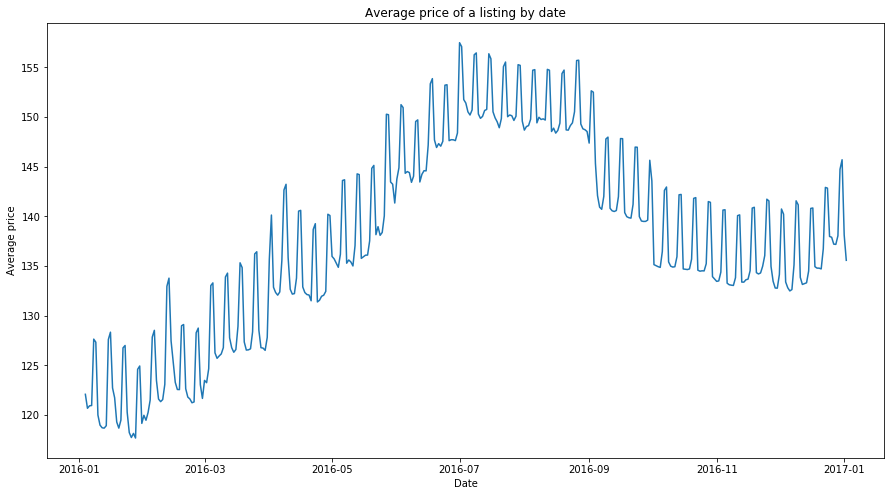

In [12]:
#Let us plot a line chart to see how the price vary over a period of time
plt.figure(figsize=(15,8))
plt.plot(calender_seattle['date'],calender_seattle['price'])
plt.title('Average price of a listing by date')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.show()

In [13]:
#So,we can see that the peak period is from July to September as far as the cost is concerned

In [14]:
calender_seattle['Day of the week']=calender_seattle['date'].dt.weekday_name

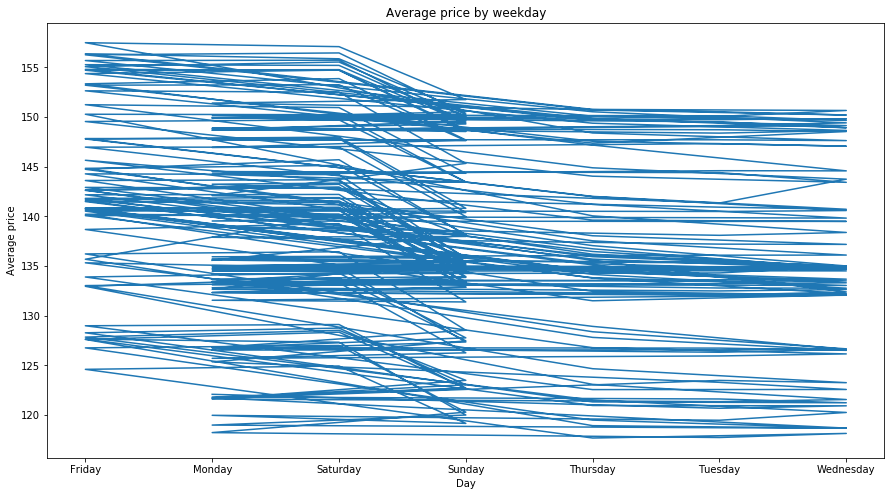

In [15]:
plt.figure(figsize=(15,8))
plt.plot(calender_seattle['Day of the week'],calender_seattle['price'])
plt.title('Average price by weekday')
plt.xlabel('Day')
plt.ylabel('Average price')
plt.show()

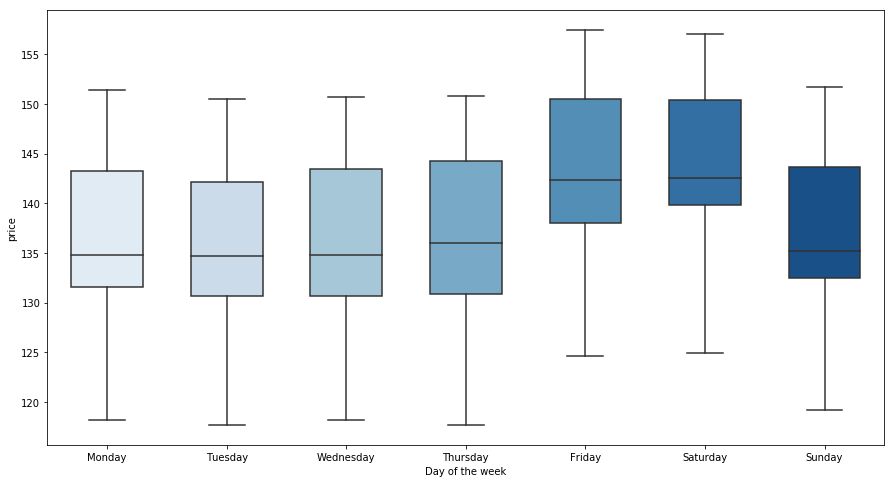

In [16]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Day of the week',  y = 'price', data = calender_seattle, palette="Blues", width=0.6)
plt.show()

In [ ]:
#So,we can see that the price for the listing is highest on Fridays and Saturdays 
#Therefore,we can conclude that the weekends have higher price for the listings when compared to the weekdays